## Summary


This project works with the <a href = "https://archive.ics.uci.edu/ml/datasets/Car+Evaluation">Car Evaluation Data Set</a> taken from the UCI Center for Machine Learning and Intelligent Systems. It includes technical information as variables and observations on various car types. The variables are used in this project as features to predict the origin of production of the car. The target variable or label is the origin of manufacturing. Is the origin of the car either North America, Europe, or Asia? 

<ul>
<li>mpg -- Miles per gallon, Continuous.</li>
<li>cylinders -- Number of cylinders in the motor, Integer, Ordinal, and Categorical.</li>
<li>displacement -- Size of the motor, Continuous.</li>
<li>horsepower -- Horsepower produced, Continuous.</li>
<li>acceleration -- Acceleration, Continuous.</li>
<li>year -- Year the car was built, Integer and Categorical.</li>
<li>origin -- Integer and Categorical. 1: North America, 2: Europe, 3: Asia.</li>
</ul>

As the target variable has got three unique origins to choose from, making predictions creates a multiclass classification. The one-versus-all method of multiclass classification is applied here. The one-versus-all method 
offers a good access as it transforms multiclass classification into multiple binary classification problems.
Three in this case. The data is split into train-test-split of 70 to 30. Two models with different number of
features each with 3 binary classification models are created here and evaluated with sklearn metrics functionality.



## Import packages

In [402]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
# from sklearn.metrics import multilabel_confusion_matrix

## Import data

In [403]:
cars = pd.read_csv("auto.csv", sep=",", header=0)

## Explore the data

In [404]:
cars.shape

(392, 8)

In [405]:
cars.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin'],
      dtype='object')

In [406]:
cars.index

RangeIndex(start=0, stop=392, step=1)

In [407]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 8 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null float64
weight          392 non-null float64
acceleration    392 non-null float64
year            392 non-null int64
origin          392 non-null int64
dtypes: float64(5), int64(3)
memory usage: 24.6 KB


In [408]:
cars.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
year              int64
origin            int64
dtype: object

Some columns are of float type and can be use immediately as features. Others are date or categorical.

In [409]:
cars.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [410]:
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [411]:
cars.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
387,27.0,4,140.0,86.0,2790.0,15.6,82,1
388,44.0,4,97.0,52.0,2130.0,24.6,82,2
389,32.0,4,135.0,84.0,2295.0,11.6,82,1
390,28.0,4,120.0,79.0,2625.0,18.6,82,1
391,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [412]:
cars_names = list(cars.columns)
cars_names
# cars_names[2]
# cars[cars_names[2]]

['mpg',
 'cylinders',
 'displacement',
 'horsepower',
 'weight',
 'acceleration',
 'year',
 'origin']

In [413]:
names_33 = [i for i in cars_names]
names_33

['mpg',
 'cylinders',
 'displacement',
 'horsepower',
 'weight',
 'acceleration',
 'year',
 'origin']

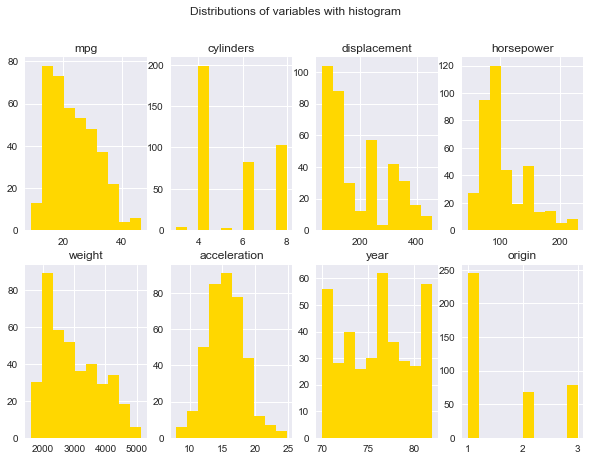

In [414]:
fig, axs = plt.subplots(2,4, figsize=(10,7))
axs = axs.ravel()
fig.suptitle('Distributions of variables with histogram')
for i in range(8):
    axs[i].hist(cars[cars_names[i]], color="gold")
    axs[i].set_title(cars_names[i])
plt.show()

The scales differ and data transformation is a consideration 
avoiding distortions by weight of scales.


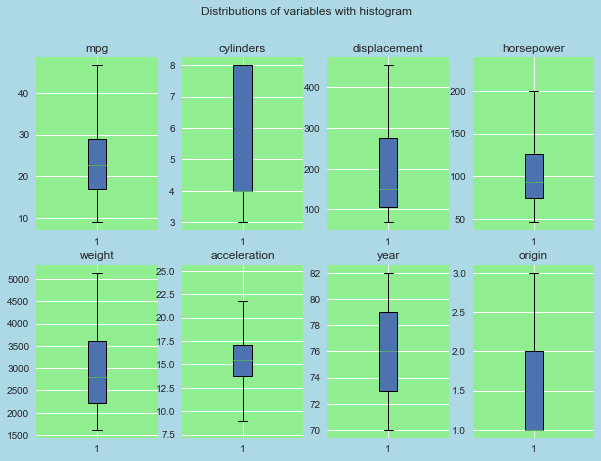

In [415]:

fig, axs = plt.subplots(2,4, figsize=(10,7), facecolor="lightblue")
axs = axs.ravel()
fig.suptitle('Distributions of variables with histogram')
for i in range(8):
    axs[i].boxplot(cars[cars_names[i]], showbox = True, patch_artist=True)
    axs[i].set_facecolor("lightgreen")
    axs[i].set_title(cars_names[i])
    
    
plt.show()

Target label variable: origin<br>
Integer and Categorical.<br> 
Factor levels: 1: North America, 2: Europe, 3: Asia.

In [416]:
print(cars['origin'].unique())
print(cars['origin'].value_counts())

[1 3 2]
1    245
3     79
2     68
Name: origin, dtype: int64


Aggregate by origin.

In [417]:
cars.groupby('origin')[['mpg', 'cylinders', 'weight']].\
aggregate(["mean", "std", "max", "min", "median"]).transpose()

origin                      1            2            3
mpg       mean      20.033469    27.602941    30.450633
          std        6.440384     6.580182     6.090048
          max       39.000000    44.300000    46.600000
          min        9.000000    16.200000    18.000000
          median    18.500000    26.000000    31.600000
cylinders mean       6.277551     4.161765     4.101266
          std        1.655996     0.506975     0.590414
          max        8.000000     6.000000     6.000000
          min        4.000000     4.000000     3.000000
          median     6.000000     4.000000     4.000000
weight    mean    3372.489796  2433.470588  2221.227848
          std      795.346690   491.813867   320.497248
          max     5140.000000  3820.000000  2930.000000
          min     1800.000000  1825.000000  1613.000000
          median  3381.000000  2240.000000  2155.000000

Correlation between origin and other variables.

In [418]:
cars_corr_matrix=cars.corr()
correlation_origin_other = cars_corr_matrix.loc[:,'origin']
correlation_origin_other 

mpg             0.565209
cylinders      -0.568932
displacement   -0.614535
horsepower     -0.455171
weight         -0.585005
acceleration    0.212746
year            0.181528
origin          1.000000
Name: origin, dtype: float64

The strongest positive correlation is between origin and mpg, and the 
strongest negative correlation is between origin and displacement.

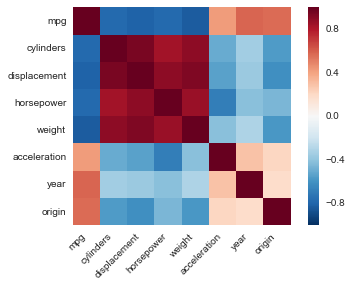

In [419]:
ax = sns.heatmap(
    cars_corr_matrix, 
    vmin=-1, vmax=1, center=0,
    # cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

There is a strong correlation between cylinders 
and weight, horsepower, displacement.

## Cleaning data

In [420]:
cars.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
dtype: int64

There are no null values.

In [421]:
# for i in cars:
#    print(cars[i].unique())
# There are none odd values, which could be input errors.

### Is the data tidy?

In [422]:
print(cars.columns)
print(cars.index)
# Column headers are values, not variable names.
# This not the case - tidy!
# Multiple variables are stored in one column
# This not the case - tidy!
# Variables are stored in both rows and columns
# This not the case - tidy!

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin'],
      dtype='object')
RangeIndex(start=0, stop=392, step=1)


The data is clean and tidy.

### Categorical data?

<p>
"Categorical variables take on values that are names or labels. The color of a ball (e.g., red, green, blue) or the breed of a dog (e.g., collie, shepherd, terrier) would be examples of categorical variables."
(Categorical variables are not measurable.)<br>
<a href="https://stattrek.com/statistics/dictionary.aspx?definition=categorical%20variable">Stat Trek</a><br>

</p>

In [423]:
cars.dtypes
# print(cars.columns[1])
# print(cars[cars.columns[1]].dtype)
# print(cars[cars.columns[1]].unique())

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
year              int64
origin            int64
dtype: object

In [424]:
for i in range(0, cars.shape[1]):
    if cars[cars.columns[i]].dtype == "int64":
        print(cars.columns[i], ":", np.sort(cars[cars.columns[i]].unique()))

cylinders : [3 4 5 6 8]
year : [70 71 72 73 74 75 76 77 78 79 80 81 82]
origin : [1 2 3]


Origin is the label variable. Cylinders and year while a date are candidates for categorical variables. <br>
Values of categorical variables are coded as dummy variables with binary states of 0 and 1.
Essentially changing a long data frame to wide data frame. 

In [425]:
cars_2 = cars.copy()
cylinders_dummies = pd.get_dummies(cars_2['cylinders'], prefix="cyl")
print(cylinders_dummies.info())
print(cylinders_dummies.head())
print(cylinders_dummies.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 5 columns):
cyl_3    392 non-null uint8
cyl_4    392 non-null uint8
cyl_5    392 non-null uint8
cyl_6    392 non-null uint8
cyl_8    392 non-null uint8
dtypes: uint8(5)
memory usage: 2.0 KB
None
   cyl_3  cyl_4  cyl_5  cyl_6  cyl_8
0      0      0      0      0      1
1      0      0      0      0      1
2      0      0      0      0      1
3      0      0      0      0      1
4      0      0      0      0      1
     cyl_3  cyl_4  cyl_5  cyl_6  cyl_8
387      0      1      0      0      0
388      0      1      0      0      0
389      0      1      0      0      0
390      0      1      0      0      0
391      0      1      0      0      0


If observations has 8 cylinders then all other cylinder values are 0 of course.

In [426]:
cars_2 = pd.concat([cars_2, cylinders_dummies], axis=1)
cars_2.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'cyl_3', 'cyl_4', 'cyl_5', 'cyl_6',
       'cyl_8'],
      dtype='object')

Years is treated here as a categorical variable as construction year is rather a label than a ratio relationship.
It is therefore encoded with dummies too.

In [427]:
years_dummies = pd.get_dummies(cars_2['year'], prefix="year")
print(years_dummies.columns)

Index(['year_70', 'year_71', 'year_72', 'year_73', 'year_74', 'year_75',
       'year_76', 'year_77', 'year_78', 'year_79', 'year_80', 'year_81',
       'year_82'],
      dtype='object')


In [428]:
cars_2 = pd.concat([cars_2, years_dummies], axis=1)
cars_2.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'cyl_3', 'cyl_4', 'cyl_5', 'cyl_6',
       'cyl_8', 'year_70', 'year_71', 'year_72', 'year_73', 'year_74',
       'year_75', 'year_76', 'year_77', 'year_78', 'year_79', 'year_80',
       'year_81', 'year_82'],
      dtype='object')

In [429]:
# dropping original colums from the header
cars_3 = cars_2.copy()
cars_566 = cars_2.copy()
cars_3=cars_3.drop(['year', 'cylinders'], axis=1)
print(len(cars_2.columns))
print(len(cars_3.columns))

26
24


## Multiclass classification: one-versus-all method.

### Train-test-split
Doing a simple train-test-split by shuffling the index.

In [430]:
cars_3_index=cars_3.index
index_first_five = [i for i in cars_3.index[0:5]]
print(index_first_five)
# Randomly permute a sequence, or return a permuted range.

index_shuffled_3 = np.random.RandomState(seed=42).permutation(cars_3_index)
print(index_shuffled_3[0:5])

cars_4_shuffled = cars_3.loc[index_shuffled_3]
print(cars_4_shuffled.index[0:5])
print(cars_4_shuffled.shape)
cars_4_shuffled.columns
# only new created columns
# cars_4_shuffled.iloc[0:3,6:-1]

[0, 1, 2, 3, 4]
[ 78 274 246  55 387]
Int64Index([78, 274, 246, 55, 387], dtype='int64')
(392, 24)


Index(['mpg', 'displacement', 'horsepower', 'weight', 'acceleration', 'origin',
       'cyl_3', 'cyl_4', 'cyl_5', 'cyl_6', 'cyl_8', 'year_70', 'year_71',
       'year_72', 'year_73', 'year_74', 'year_75', 'year_76', 'year_77',
       'year_78', 'year_79', 'year_80', 'year_81', 'year_82'],
      dtype='object')

Create a training partition.

In [431]:
train_length = round(0.7 *cars_4_shuffled.shape[0])
print("Train length: ", train_length)

# round(0.7 *cars_4_shuffled.shape[0])
train_1 = cars_4_shuffled[0:train_length]
print(train_1.shape)
print(train_1.index[0:5])
print(train_1.columns)


Train length:  274
(274, 24)
Int64Index([78, 274, 246, 55, 387], dtype='int64')
Index(['mpg', 'displacement', 'horsepower', 'weight', 'acceleration', 'origin',
       'cyl_3', 'cyl_4', 'cyl_5', 'cyl_6', 'cyl_8', 'year_70', 'year_71',
       'year_72', 'year_73', 'year_74', 'year_75', 'year_76', 'year_77',
       'year_78', 'year_79', 'year_80', 'year_81', 'year_82'],
      dtype='object')


Split the training partition into features and label data frames.

In [432]:
# Create training data frame of features
X_train_1 = train_1.drop(['origin'], axis=1)
# print(X_train_1.columns)
# [['origin']] is necessary to return a data frame otherwise a series would be returned and this would not
#  work out when applying the algorithm which needs data frames
# Create a training data frame of the target 
Y_train_1 = train_1[['origin']]
print(Y_train_1.columns)
print(Y_train_1.head())
print(Y_train_1.info())
print(X_train_1.shape)
print(Y_train_1.shape)

Index(['origin'], dtype='object')
     origin
78        2
274       2
246       3
55        1
387       1
<class 'pandas.core.frame.DataFrame'>
Int64Index: 274 entries, 78 to 325
Data columns (total 1 columns):
origin    274 non-null int64
dtypes: int64(1)
memory usage: 4.3 KB
None
(274, 23)
(274, 1)


Create a test partition.

In [433]:
# len(cars_4_shuffled)
test_1 = cars_4_shuffled[train_length:]
test_1.shape
test_1.index[0:5]

Int64Index([4, 256, 350, 100, 226], dtype='int64')

Split the test partition into features and label data frames.

In [434]:
# test_1.head()
X_test_1 = test_1.drop(['origin'], axis=1)
# print(X_test_1.columns)
Y_test_1 = test_1[['origin']]
print(Y_test_1.shape)
print(X_test_1.shape)
print(Y_test_1.info())

(118, 1)
(118, 23)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 118 entries, 4 to 102
Data columns (total 1 columns):
origin    118 non-null int64
dtypes: int64(1)
memory usage: 1.8 KB
None


### Logistic regression model with cylinder & year variables as features and origin as label

In [435]:

unique_origins = cars["origin"].unique()
unique_origins.sort()
print(unique_origins)


[1 2 3]


#### Train 3 logistic regression models using a for loop.

In [436]:
# Select the training d.iloc[0:3,6:-1]
X_train_2 = X_train_1.iloc[:, 6:-1]
X_train_2.columns

# Select the testing features
X_test_2 = X_test_1.iloc[:,6:-1]




In [437]:
# Prepare the label column to match unique values with 
boolean_values = []
for value in unique_origins:
    Y_train_2=Y_train_1['origin'] == value
    boolean_values.append(Y_train_2)
print(boolean_values[0][0:5])    

78     False
274    False
246    False
55      True
387     True
Name: origin, dtype: bool


In [438]:
logreg_models = {}
for value in unique_origins:
    # Instantiate model classifier
    logregmodel = LogisticRegression()
    # Train a model for the unique value of the origin variable: either 1,2 or 3
    Y_train_2=Y_train_1['origin'] == value
    # Fit model classifier to the training data
    logregmodel.fit(X_train_2, Y_train_2)
    # Put current model into dictionary
    logreg_models[value] = logregmodel
    
print(logreg_models)  

{1: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False), 2: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False), 3: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)}


####  Predictions of origin with years and cylinders

In [439]:
# print(X_test_1.iloc[:,6:-1].columns)
# Create an empty data frame
storing_predicted_probabilities = pd.DataFrame(columns=unique_origins)
print(storing_predicted_probabilities)
for value in unique_origins:
    
    storing_predicted_probabilities[value] = logreg_models[value].predict_proba(X_test_2)[:,1]
    
print(storing_predicted_probabilities.head())
print(storing_predicted_probabilities.shape)
print(118*3)

Empty DataFrame
Columns: [1, 2, 3]
Index: []
          1         2         3
0  0.962892  0.034712  0.021662
1  0.785225  0.059077  0.145179
2  0.342923  0.186442  0.473190
3  0.832646  0.100823  0.066686
4  0.856615  0.064505  0.090242
(118, 3)
354


In [440]:
max_value_above_cols = storing_predicted_probabilities.idxmax(axis=1)
print(max_value_above_cols[0:5])
print(type(max_value_above_cols))

0    1
1    1
2    3
3    1
4    1
dtype: int64
<class 'pandas.core.series.Series'>


The probabilities are stored equivalent to the origin (1,2,3) in the dataframe. For every observation in the
testing set probabilities for the 3 origins are available and can be selected as a prediction of the origin.
The origin choosen as prediction is the highest or  maximal probability of the 3 probabilities.

In [441]:
predicted_origins_1 = max_value_above_cols

#### Evaluating predictions 

In [442]:
confusion_matrix(Y_test_1, predicted_origins_1,labels=unique_origins)

array([[58,  1, 22],
       [ 6,  6,  5],
       [ 7,  3, 10]])

In [443]:
accuracy_1 = accuracy_score(Y_test_1, predicted_origins_1 )
accuracy_1

0.6271186440677966

The accuracy as the number of correct predictions (TP+TN) of all observations (TP+TN / (TP+TN+FP+FN)) is ca.63%.
6 out of 10 are predicted correctly.

In [444]:
target_names_1 = ['Origin: 1', 'Origin: 2', 'Origin: 3']
print(classification_report(Y_test_1, predicted_origins_1, target_names=target_names_1))


             precision    recall  f1-score   support

  Origin: 1       0.82      0.72      0.76        81
  Origin: 2       0.60      0.35      0.44        17
  Origin: 3       0.27      0.50      0.35        20

avg / total       0.69      0.63      0.65       118



Recall: the ability of the classification model to find all positive conditions correctly (tp / tp + fn) is 72% or 7 out of 10 for origin 1.<br>
Precision: the ability of the classification model to predict a negative outcome not as positive (tp/ tp + fp) is 82% or 8 out of 10 for origin 1.

### Logistic regression model with all variables as features and origin as label

#### Train 3 logistic regression models with all features using a for loop.

In [445]:
# Select the training d.iloc[0:3,6:-1]
X_train_3 = X_train_1
print(X_train_3.shape)

# Select the testing features
X_test_3 = X_test_1
print(X_test_3.shape)
print(X_test_3.columns)

(274, 23)
(118, 23)
Index(['mpg', 'displacement', 'horsepower', 'weight', 'acceleration', 'cyl_3',
       'cyl_4', 'cyl_5', 'cyl_6', 'cyl_8', 'year_70', 'year_71', 'year_72',
       'year_73', 'year_74', 'year_75', 'year_76', 'year_77', 'year_78',
       'year_79', 'year_80', 'year_81', 'year_82'],
      dtype='object')


In [446]:
logreg_models_3 = {}
for value in unique_origins:
    # Instantiate model classifier
    logregmodel_3 = LogisticRegression()
    # Train a model for the unique value of the origin variable: either 1,2 or 3
    Y_train_2=Y_train_1['origin'] == value
    # Fit model classifier to the training data
    logregmodel_3.fit(X_train_3, Y_train_2)
    # Put current model into dictionary
    logreg_models_3[value] = logregmodel_3
    
print(logreg_models_3)  

{1: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False), 2: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False), 3: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)}


####  Predictions of origin with all features

In [447]:
storing_predicted_probabilities_3 = pd.DataFrame(columns=unique_origins)

for value in unique_origins:
    
    storing_predicted_probabilities_3[value] = logreg_models_3[value].predict_proba(X_test_3)[:,1]
    
print(storing_predicted_probabilities_3.head())
print(storing_predicted_probabilities_3.shape)


          1         2         3
0  0.999997  0.000076  0.000463
1  0.997056  0.007760  0.003336
2  0.228149  0.165646  0.487923
3  0.985393  0.015685  0.012084
4  0.999807  0.003696  0.000371
(118, 3)


In [448]:
predicting_origins_3 = storing_predicted_probabilities_3.idxmax(axis=1)
predicting_origins_3[0:10]

0    1
1    1
2    3
3    1
4    1
5    1
6    1
7    2
8    1
9    3
dtype: int64

#### Evaluating predictions 

In [449]:
confusion_matrix(Y_test_1, predicting_origins_3 ,labels=unique_origins)

array([[69,  2, 10],
       [ 3,  5,  9],
       [ 1,  6, 13]])

In [450]:

print(classification_report(Y_test_1, predicting_origins_3, target_names=target_names_1))


             precision    recall  f1-score   support

  Origin: 1       0.95      0.85      0.90        81
  Origin: 2       0.38      0.29      0.33        17
  Origin: 3       0.41      0.65      0.50        20

avg / total       0.77      0.74      0.75       118



In [451]:
accuracy_2 = accuracy_score(Y_test_1, predicting_origins_3 )
accuracy_2

0.73728813559322037

The accuracy is improved from 0.627 to 0.737. Further improvements can be achieved with hyperparameter tuning.